In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
transaction_data = pd.read_csv('data-science-exercise-data.csv')

In [3]:
transaction_data.head()

,CustomerID,Timestamp,PurchaseValue
0,5611860a94204a4078659f1667372cc4,2017-02-09T18:31:00Z,4.72
1,07b260307114f9cffc5601eb7ad4b565,2017-06-28T19:26:00Z,5.33
2,1ede55062d0d68c70fc4d355a5328d11,2017-07-28T17:47:00Z,5.35
3,42b8e86e8da5e35628bcdc146c358665,2016-12-17T22:59:00Z,6.00
4,1047f2787b7efc759d7ffcbc40ef7e19,2016-12-05T17:23:00Z,6.28


In [4]:
# transform transaction data to summary data
transaction_data['Timestamp'] = transaction_data['Timestamp'].apply(pd.to_datetime)
from lifetimes.utils import summary_data_from_transaction_data
summary_with_money_value = summary_data_from_transaction_data(
    transaction_data, 'CustomerID', 'Timestamp', monetary_value_col = 'PurchaseValue')

C:\Users\Ruopei\Anaconda3\lib\site-packages\lifetimes\utils.py:265: UserWarning: Converting to Period representation will drop timezone information.
  pd.to_datetime(transactions[datetime_col].max(), format=datetime_format).to_period(freq).to_timestamp()
C:\Users\Ruopei\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [5]:
summary_with_money_value.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
0001117ff1305c1fe840697166e61564,1.0,11.0,344.0,87.280
00028502859fd7e111d88c20456b59d5,0.0,0.0,342.0,0.000
000306d200fd6e9b03de48d15348f5c2,0.0,0.0,33.0,0.000
0003f3458a6e7b495a975c2d9ddda559,2.0,285.0,343.0,88.065
000784b838b807ad589d4bc69c0c562f,0.0,0.0,210.0,0.000


### 1. Implement the modified BG model from the lifetimes package using the data we provide

In [6]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary_with_money_value['frequency'], 
        summary_with_money_value['recency'], 
        summary_with_money_value['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 23708 subjects, a: 0.57, alpha: 60.57, b: 2.95, r: 0.41>


In [7]:
# Predict expected number of purchases in the next year (365 days)
t = 365
summary_with_money_value['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, 
                                                    summary_with_money_value['frequency'],
                                                    summary_with_money_value['recency'], 
                                                    summary_with_money_value['T'])

### 2. List the 100 customers predicted to make the most purchases over the next 12 months (365 days)

In [8]:
summary_with_money_value.sort_values(by='predicted_purchases', ascending=False).head(100)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
a5fadc51b1ae844ad9a70ad3cfa46a64,95.0,371.0,371.0,433.962632,66.715396
48a503edbaded96a3be27deee11967a1,46.0,363.0,371.0,220.476739,31.845175
9f447f9415a380ac2eeee7df49c6ee7e,23.0,163.0,166.0,110.196522,27.442656
5f01420f0edda6555df5ce1cc62b986c,39.0,350.0,370.0,299.122821,25.572084
8d2ce54737dd404d20cadf1405d46dc8,33.0,360.0,362.0,123.195152,23.607814
3b11478939967e896ae2619615650f97,20.0,190.0,194.0,58.866000,21.746411
a62a17bb46864da2c6da691d838971b3,30.0,366.0,366.0,307.961000,21.359421
2ad9a83ee23110d8c2f4c01600b94f20,29.0,357.0,364.0,146.420690,20.500784
75fda9ea22086bf3814ff8c3f53de8ca,28.0,348.0,355.0,196.032857,20.160264


In [9]:
# Use gamma-gamma model to predict expected average lifetime value of the customers
from lifetimes import GammaGammaFitter

# find out returning customers
returning_customers_summary = summary_with_money_value[summary_with_money_value['frequency']>0]

# fit to model
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 9647 subjects, p: 4.57, q: 3.65, v: 135.88>


In [10]:
# expected averge transaction value by customer
expected_average_profit_by_customer = ggf.conditional_expected_average_profit(
                   summary_with_money_value['frequency'],
                   summary_with_money_value['monetary_value'])

### 3. List the 100 customers predicted to spend the most over the next 12 months

It is calculated by multiplying the predicted number of purchases (using BG model) by the expected average transaction value (using gamma-gamma model) for each customer.

In [11]:
expected_average_profit_by_customer.multiply(
    summary_with_money_value['predicted_purchases']).sort_values(ascending = False).head(100)

CustomerID
a5fadc51b1ae844ad9a70ad3cfa46a64    28871.159253
ca2202a96c2de6ca6b8a37a4a73fa730    23176.978374
dca76db00cc59dfbcdcc97c8bbc7f9f1    12151.778376
5ac5ed64cd99ed2a8403b7a927e644ef    11202.629089
60c19a709e3ced2d16d7100eb1069df5     9900.182974
98f8e41f45721cbe49a3147f6cf62432     7891.914295
a92534133444b5028d12a129b1b128f7     7837.232927
5f01420f0edda6555df5ce1cc62b986c     7624.901739
742d5a52d4df7cb14246d7f390de5d8a     7387.582073
a719d6643a7832535de9aded2f467825     7202.419414
ed2b4332b3ca253cfbb0ffb54d3f5ae0     7173.874629
089ecc49200cfe79584d0bec2a3cf8c0     7167.398626
eba458987dc67827871c1d4d92e646e1     7149.671128
922bdaa119d44065b17b0447255646ae     7106.939613
24f05bfab01fef56ec049a828ebe20ab     7038.977830
48a503edbaded96a3be27deee11967a1     7026.598648
9cb19c3fc7311aae01cf16571b528001     6988.494350
30aa99d3357244cf38ca04eadef1473a     6780.226165
66162981fc95e268e45bbfc738059687     6760.872006
a62a17bb46864da2c6da691d838971b3     6548.026635
cd4cb9ec2

### 4. Explain the statistical assumptions that the model makes. Do you think those assumptions are valid for a model of a customer buying widgets from an ecommerce store?

The Beta-Geometric model makes 5 assumptions (as discussed in the paper by Fader and Hardie): 
1. The number of transactions made by a customer follows a Poisson process. 
2. Heterogeneity in lambda follows a gamma distribution. 
3. A customer becomes inactive after any transaction with a probability p. 
4. Heterogeneity in p follows a beta distribution. 
5. The transaction rate lambda and dropout probability p vary independently across customers.

As a model of a customer buying widgets from an ecommerce store:

First of all, I think 2 and 4 are valid assumptions because there will be some heterogeneity among customers and both Gamma and Beta functions are flexible functions that are capable of fitting a variety of distribution shapes.

Assumption 1 is not entirely accurate. In the plot below, we can see a clear increase in the number of transactions during the holiday season. It is also possible that the smaller peaks are correlated with events such as the releases of new devices. The transaction rate is at least somewhat time dependent.

Assumption 3 is reasonable, although it is not accurate in predicting behaviors on a longer time scale. There is more explanation in my answer to question 6.

Assumption 5 is probably valid, but I can also imagine a negative correlation between the lambda and p for a customer: a customer that makes frequent purchases is less likely to drop out.

Text(0,0.5,'number of transactions')

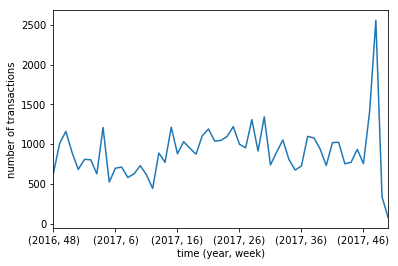

In [12]:
# plot the number of purchases vs time
transaction_data['CustomerID'].groupby([transaction_data['Timestamp'].dt.year, 
                          transaction_data['Timestamp'].dt.week]).count().plot(kind="line")
plt.xlabel('time (year, week)')
plt.ylabel('number of transactions')

The Gamma-Gamma model makes the assumption that the monetary value of a transaction is independent of the purchase frequency of a customer, which is roughly true. Even though the distribution of transaction values is wider at low frequency, the mean transaction value remains constant across different frequencies (see the two plots below).

Text(0,0.5,'average purchase value (per customer)')

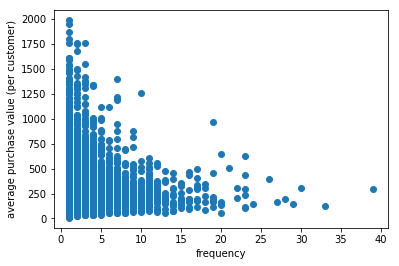

In [13]:
# plot the relationship between monetary value and purchase frequency
summary_outliers_removed = summary_with_money_value[(summary_with_money_value['frequency']<40) &
                                                    (summary_with_money_value['frequency']>0) &
                                                    (summary_with_money_value['monetary_value']<2000)]

plt.scatter(
    summary_outliers_removed['frequency'], summary_outliers_removed['monetary_value'])
plt.xlabel('frequency')
plt.ylabel('average purchase value (per customer)')

Text(0,0.5,'average purchase value (all customers)')

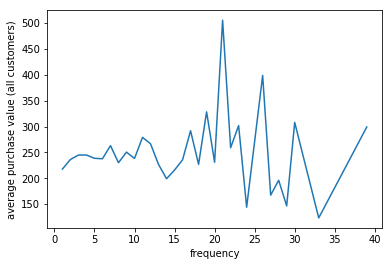

In [25]:
plt.plot(summary_outliers_removed.groupby(['frequency']).mean()['monetary_value'])
plt.xlabel('frequency')
plt.ylabel('average purchase value (all customers)')

### 5. Write a simulation that shows how many customers are alive after 10 days, 1 year, 10 years and 100 years and how many purchases they have made in that time using the modified BG model.

I approach this problem by dividing the future into discrete, short periods of time (1 day). The status of the customers is updated after each period. The prediction of customer behavior in the future is then simulation by iteration.

In [15]:
def simulate_customer_status(sample_customers, ndays):

    customers_alive = sample_customers.copy()
    customers_dead = pd.DataFrame(columns=customers_alive.columns)

    for _ in range(ndays):

        # calculate the probability of a customer making 1 purchase within a day
        
        # here I made two assumptions:
        # 1. each customer can make either 0 or 1 purchase on a given day
        # 2. the probability of a customer making 1 purchase equals
        # the expected number of puchases during the same period of time
        # These should be resonable approximations because the purchasing behavior is a Poisson process 
        # with a very small lambda
        
        t = 1   # one day
        predicted_purchases = bgf.conditional_expected_number_of_purchases_up_to_time(t, 
                                                        customers_alive['frequency'],
                                                        customers_alive['recency'], 
                                                        customers_alive['T'])

        # the age of all customers grows by 1
        customers_alive['T'] += 1

        # use a random number generator to simulate whether a new purchase happens
        has_new_purchase = np.random.rand(customers_alive.shape[0]) < predicted_purchases
        customers_alive.loc[has_new_purchase,'frequency'] += 1
        customers_alive.loc[has_new_purchase,'recency'] = customers_alive.loc[has_new_purchase,'T']
        customers_alive.loc[has_new_purchase,'num_purchases'] += 1

        # I calculate the conditional probability a customer being alive after each purchase 
        # and use a random number to simulate whether a customer survives this purchase
        customers_purchased = customers_alive[has_new_purchase]
        chance_survival = bgf.conditional_probability_alive(customers_purchased['frequency'],
                                          customers_purchased['recency'], 
                                          customers_purchased['T'])
        dead = customers_purchased.loc[np.random.rand(customers_purchased.shape[0]) > \
                                       chance_survival, :]

        if not dead.empty:
            # add dead customers to customers_dead
            customers_dead = customers_dead.append(dead, ignore_index=False)
            # remove dead customers from customers_alive
            customers_alive.drop(list(dead.index.values), inplace=True)

    # number of purchases
    num_purchases = customers_alive['num_purchases'].sum() + customers_dead['num_purchases'].sum()
    # number of customers that are alive after ndays
    num_customers_alive = customers_alive.shape[0]

    return customers_alive, customers_dead, num_purchases, num_customers_alive

Simulate how many customers are alive after 10 days, 1 year, 10 years and 100 years and how many purchases they have made in that time. Note that these are independent experiments: the simulation for 100 years is not a continuation of the simulation for 10 years, even though they used the same samples.

In [16]:
# select 100 random customers for simulation
sample_customers = summary_with_money_value.drop(
    ['monetary_value', 'predicted_purchases'],axis=1).sample(n=100)
sample_customers['num_purchases'] = 0
customers_alive_10d, customers_dead_10d, num_purchases_10d, num_customers_alive_10d = simulate_customer_status(
    sample_customers, 10)    
customers_alive_1y, customers_dead_1y, num_purchases_1y, num_customers_alive_1y = simulate_customer_status(
    sample_customers, 365)
customers_alive_10y, customers_dead_10y, num_purchases_10y, num_customers_alive_10y = simulate_customer_status(
    sample_customers, 3650)
customers_alive_100y, customers_dead_100y, num_purchases_100y, num_customers_alive_100y = simulate_customer_status(
    sample_customers, 36500)

In [17]:
# result
print(f'In 10 days,   the customers have made {num_purchases_10d} purchases.  {num_customers_alive_10d} customers are alive.')
print(f'In 1 year,    the customers have made {num_purchases_1y} purchases.  {num_customers_alive_1y} customers are alive.')
print(f'In 10 years,  the customers have made {num_purchases_10y} purchases. {num_customers_alive_10y} customers are alive.')
print(f'In 100 years, the customers have made {num_purchases_100y} purchases. {num_customers_alive_100y} customers are alive.')

In 10 days,   the customers have made 5 purchases.  99 customers are alive.
In 1 year,    the customers have made 122 purchases.  91 customers are alive.
In 10 years,  the customers have made 391 purchases. 69 customers are alive.
In 100 years, the customers have made 633 purchases. 57 customers are alive.


Note that the numbers of customers alive shown above are the number of customers that are classified as alive according to the model. The expected numbers of customers alive are calculated as follows:

In [18]:
def calc_expected_num_alive(customers_alive):
    return bgf.conditional_probability_alive(customers_alive['frequency'],
                              customers_alive['recency'], 
                              customers_alive['T']).sum()

print(f'In 10 days,   the expected number of customers alive is {calc_expected_num_alive(customers_alive_10d)}')
print(f'In 1 year,    the expected number of customers alive is {calc_expected_num_alive(customers_alive_1y)}')
print(f'In 10 years,  the expected number of customers alive is {calc_expected_num_alive(customers_alive_10y)}')
print(f'In 100 years, the expected number of customers alive is {calc_expected_num_alive(customers_alive_100y)}')

In 10 days,   the expected number of customers alive is 88.42829757557539
In 1 year,    the expected number of customers alive is 68.91310429919817
In 10 years,  the expected number of customers alive is 39.47605787372948
In 100 years, the expected number of customers alive is 18.08586940369754


I tested the consistency of the simulation and compared the estimated number of purchases yielded in the simulation with the results from built-in function in the toolbox.

In [19]:
# run the 1-year simulation 50 times to test the consistency of simulation results
num_alive = []
num_purchases = []
for _ in range(50):
    # select 100 random customers for simulation
    sample_customers = summary_with_money_value.drop(
        ['monetary_value', 'predicted_purchases'],axis=1).sample(n=100)
    sample_customers['num_purchases'] = 0
        
    _, _, num_purchases_1y, num_customers_alive_1y = simulate_customer_status(
        sample_customers, 365)

    num_alive.append(num_customers_alive_1y)
    num_purchases.append(num_purchases_1y)

Text(0.5,1,'results from 50 runs of simulation')

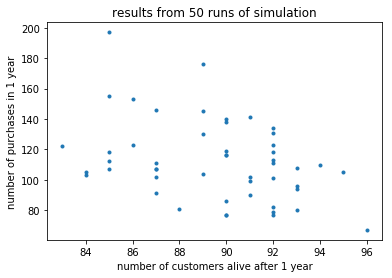

In [20]:
plt.plot(num_alive, num_purchases,'.')
plt.xlabel('number of customers alive after 1 year')
plt.ylabel('number of purchases in 1 year')
plt.title('results from 50 runs of simulation')

In [21]:
# Predict expected number of purchases in 1 year using a built-in function in the toolbox
num_purchases_method2 = []
for _ in range(50):
    # select 100 random customers for simulation
    sample_customers = summary_with_money_value.sample(n=100)
    
    t = 365
    num_purchases_built_in = bgf.conditional_expected_number_of_purchases_up_to_time(t, 
                                                        sample_customers['frequency'],
                                                        sample_customers['recency'], 
                                                        sample_customers['T'])
    num_purchases_method2.append(num_purchases_built_in.sum())
    
# compare the results from 2 methods
print(f'Average number of purchases in 1 year calculated by simulation: \n \
    {sum(num_purchases)/50} +/- {np.std(num_purchases)/np.sqrt(50)}')
print(f'Average number of purchases calculated with the function in toolbox: \n \
    {sum(num_purchases_method2)/50} +/- {np.std(num_purchases_method2)/np.sqrt(50)}')

Average number of purchases in 1 year calculated by simulation: 
     112.5 +/- 3.673390804148124
Average number of purchases calculated with the function in toolbox: 
     132.749723136137 +/- 2.224596192118256


There is some discrepancy between the predicted number of purchases using the simulation comparing to the result using a built in function in the toolbox, however I did not find the reason.

### 6.  The model works well in some ways and poorly in others for the data we provide. Explain what it does a well and what it does poorly.

Things it does well:

The model only sees the transaction data of the customers from a short period of time, yet it effectively captures the behavior of the population and can be used to predict the purchase behavior on a much longer time scale.

Things it does poorly:

According to the model, the number of customers will constantly decrease because there would be no new customers, which is unlikely.

The simulation results are not very consistent between runs (see the plot above).

The model does not do a good job estimating the number of customers alive on a longer time scale. It assumes a customer can only "die" after a purchase. However, for customers that have not made a purchase in very long time, their chance of making a purchase is very low, which also means they have a very small chance of dying. From the 100-year simulation, 57 customers are classified as "alive" after 100 years. However, 51 out of the 57 customers have not made a single purchase in the recent 20 years, which means they are effectively dead.

In [22]:
# number of customers alive after 100 years
customers_alive_100y.shape[0]

57

In [23]:
# number of customers alive after 100 years that have not purchased in the recent 20 years
customers_alive_100y[customers_alive_100y['recency']<365*80].shape[0]

51

### 7. What are one or two ideas that could address the deficiencies of the model? (No need to implement, just describe.)



We can add new customers who would make their first purchase to the simulation at a constant rate 'p(new_customer)', which can be estimated using historical data.

To enhance the consistency of simulation results, we can (a) run the simulation multiple times and take the average. (b) use a larger sample size. (c) use a different sampling method (for example, group the customers by their purchase frequency and take samples from each bin).

We can change the mechanism of dying so it can happen not only right after a purchase, but also when a customer has not purchased in a long time.

### 8. Suppose the intended use of the modified BG model is binning customers into one of the following categories: highly likely to purchase in the next year, somewhat likely to purchase in the next year, unlikely to purchase in the next year, highly unlikely to purchase in the next year. Suppose you want to compare this model with a model your colleague is proposing. How would you evaluate the two models? Do not implement, but do show a mockup of the results of your evaluation.

First of all, we should use older data for training and put aside the data from the past year for testing. 

The model evaluation would be trivial if there are only two categories (likely to purchase and unlikely to purchase). The decision we need to make here is how we should evaluate the somewhat likely and unlikely to purchase categories in the overall cost function. I think we can build a confusion matrix based the performance of the model on the test data, something like this:

| | made >=1 purchase | made 0 purchase |
| --- | --- | --- |
| highly likely | --- | --- |
| somewhat likely | --- | --- |
| somewhat unlikely | --- | --- |
| highly unlikely | --- | --- |

We can assign a cost for each cell in the confusion matrix. In general, I think the cost should satisfy the following conditions: a correct prediction for a customer in "highly likely or unlikely" categories has the lowest cost, and an incorrect prediction for those categories has the highest cost. Any prediction for a customer in the "somewhat" groups should lie in the middle. And then we can evaluate the performance of a model based on its total cost.

In practice, we should determine the cost for each situation based on specific business situations. For example, in a situation where labeling a customer as "somewhat likely or unlikely" is not very useful for the decision making, we can give higher cost to the instances classified in these two categories regardless of the result. 